<a href="https://colab.research.google.com/github/mohigeo33/lst_timeseries/blob/main/Statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Preparing the analytical environment and loading data**

In [ ]:
# library typically required for this script
!pip install altair_transform

In [2]:
#loading libraries
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import numpy as np
import seaborn as sns
import math
import altair as alt
import altair_transform
from scipy.stats import shapiro 
from scipy.stats import lognorm
from scipy.stats import kstest
from scipy.stats import norm
from sklearn.metrics import r2_score

In [3]:
# mounting the google dirive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# setting the working directory
os.chdir('/content/drive/MyDrive/Thesis/Data/AOI')
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content/drive/MyDrive/Thesis/Data/AOI


In [5]:
# function for loading the csv/txt file
def load_csv(filepath):
    data =  []
    col = []
    checkcol = False
    with open(filepath) as f:
        for val in f.readlines():
            val = val.replace("\n","")
            val = val.split(',')
            if checkcol is False:
                col = val
                checkcol = True
            else:
                data.append(val)
    df = pd.DataFrame(data=data, columns=col)
    return df

In [6]:
myData = load_csv('dfall.csv')
df = myData
print(df.head())

                SystemIndex        Millis               MeanIBI  \
0    2_LT05_126052_20000106  947127305105  -0.20598578032505066   
1    2_LT05_126052_20000122  948509683225  -0.19317203334982255   
2    2_LT05_126052_20000223  951274414645  -0.23278468351466508   
3    2_LT05_126052_20000310  952656810594  -0.18614761533203056   
4  1_2_LE07_126052_20000318  953349156882  -0.19616188171193313   

                MaxIBI               MinIBI             MeanNDVI  \
0   0.2141956979819891  -0.7074835553585818   0.4586002929559935   
1  0.15091431586040388  -0.6532029427252706    0.513571442960777   
2    0.148533997358888  -0.8693609351789929    0.453598838434882   
3  0.13204303977882137  -0.6339065211475386  0.43329910920858883   
4  0.11979207761193293  -0.6654663227031765  0.40460623483219654   

              MaxNDVI               MinNDVI             MeanMNDWI  \
0   0.790840744972229    -0.429423451423645  -0.21420265769810595   
1  0.8153073787689209  -0.21084745228290558  -0.29

In [11]:
df

,SystemIndex,Millis,MeanIBI,MaxIBI,MinIBI,MeanNDVI,MaxNDVI,MinNDVI,MeanMNDWI,MaxMNDWI,MinMNDWI,MeanLST,MaxLST,MinLST,Cloud,Timestamp,Year,Month,Day,DOY
0,2_LT05_126052_20000106,947127305105,-0.205986,0.214196,-0.707484,0.458600,0.790841,-0.429423,-0.214203,0.848649,-0.598428,25.760589,32.832072,20.374920,22.000000,2000-01-06 02:55:05.105,2000,1,6,6
1,2_LT05_126052_20000122,948509683225,-0.193172,0.150914,-0.653203,0.513571,0.815307,-0.210847,-0.293720,0.648289,-0.644933,24.394343,32.779574,20.000007,31.000000,2000-01-22 02:54:43.225,2000,1,22,22
2,2_LT05_126052_20000223,951274414645,-0.232785,0.148534,-0.869361,0.453599,0.849656,-0.360334,-0.165815,0.949137,-0.609455,34.390964,44.140048,29.395546,34.000000,2000-02-23 02:53:34.645,2000,2,23,54
3,2_LT05_126052_20000310,952656810594,-0.186148,0.132043,-0.633907,0.433299,0.679463,-0.209133,-0.189954,0.758678,-0.516442,31.308242,39.882945,26.932541,34.000000,2000-03-10 02:53:30.594,2000,3,10,70
4,1_2_LE07_126052_20000318,953349156882,-0.196162,0.119792,-0.665466,0.404606,0.667806,-0.092308,-0.147164,0.634488,-0.478164,32.094862,40.587537,24.399067,37.000000,2000-03-18 03:12:36.882,2000,3,18,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,1_1_LC08_126052_20210811,1628652008962,-0.148264,0.305834,-0.608758,0.454173,0.999150,-0.597376,-0.297131,0.867884,-0.967880,25.436674,36.283008,20.004712,34.880001,2021-08-11 03:20:08.962,2021,8,11,223
458,1_1_LC08_126052_20211030,1635564027347,-0.171840,5.949905,-2.316626,0.457725,1.000000,-0.963636,-0.279588,1.000000,-0.926506,26.783289,40.003087,21.471625,43.250000,2021-10-30 03:20:27.347,2021,10,30,303
459,1_2_LE07_126052_20211107,1636251162366,-0.169730,0.355643,-1.771092,0.344568,0.834017,-0.564333,-0.157794,0.985977,-0.738375,29.779328,46.981748,21.349140,40.000000,2021-11-07 02:12:42.366,2021,11,7,311
460,1_1_LC08_126052_20211115,1636946422543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.759998,2021-11-15 03:20:22.543,2021,11,15,319


**2. Pre-processing the data**

In [7]:
# Converting the variables into numeric
#Mean
df["MeanNDVI"] = pd.to_numeric(df["MeanNDVI"])
df["MeanIBI"] = pd.to_numeric(df["MeanIBI"])
df["MeanMNDWI"] = pd.to_numeric(df["MeanMNDWI"])
df["MeanLST"] = pd.to_numeric(df["MeanLST"])

meanndvi = df["MeanNDVI"]
meanibi = df["MeanIBI"]
meanmndwi = df["MeanMNDWI"]
meanlst = df["MeanLST"]

#Max
df["MaxNDVI"] = pd.to_numeric(df["MaxNDVI"])
df["MaxIBI"] = pd.to_numeric(df["MaxIBI"])
df["MaxMNDWI"] = pd.to_numeric(df["MaxMNDWI"])
df["MaxLST"] = pd.to_numeric(df["MaxLST"])

maxndvi = df["MaxNDVI"]
maxibi = df["MaxIBI"]
maxndwi = df["MaxMNDWI"]
maxlst = df["MaxLST"]

#Min
df["MinNDVI"] = pd.to_numeric(df["MinNDVI"])
df["MinIBI"] = pd.to_numeric(df["MinIBI"])
df["MinMNDWI"] = pd.to_numeric(df["MinMNDWI"])
df["MinLST"] = pd.to_numeric(df["MinLST"])

minndvi = df["MinNDVI"]
minibi = df["MinIBI"]
minmndwi = df["MinMNDWI"]
minlst = df["MinLST"]

#Time and cloud
df['Year'] = pd.to_numeric(df['Year'])
df['Month'] = pd.to_numeric(df['Month'])
df['Cloud'] = pd.to_numeric(df['Cloud'])

**3. Adding sensor information**

In [8]:
# Create a new DataFrame with the Category column
df2 = df.assign(Category=df['SystemIndex'].str.slice(stop=8))

# Replace the category values with 'LS5', 'LS7', and 'LS8'
df2['Category'] = df2['Category'].str.replace('2_LT05_1', 'LS5')
df2['Category'] = df2['Category'].str.replace('1_2_LE07', 'LS7')
df2['Category'] = df2['Category'].str.replace('1_1_LC08', 'LS8')

# Create a new Sensor column
df2['Sensor'] = df2['Category']

# Drop the Category column
df2 = df2.drop(columns=['Category'])
print(df2.head())


                SystemIndex        Millis   MeanIBI    MaxIBI    MinIBI  \
0    2_LT05_126052_20000106  947127305105 -0.205986  0.214196 -0.707484   
1    2_LT05_126052_20000122  948509683225 -0.193172  0.150914 -0.653203   
2    2_LT05_126052_20000223  951274414645 -0.232785  0.148534 -0.869361   
3    2_LT05_126052_20000310  952656810594 -0.186148  0.132043 -0.633907   
4  1_2_LE07_126052_20000318  953349156882 -0.196162  0.119792 -0.665466   

   MeanNDVI   MaxNDVI   MinNDVI  MeanMNDWI  MaxMNDWI  ...    MeanLST  \
0  0.458600  0.790841 -0.429423  -0.214203  0.848649  ...  25.760589   
1  0.513571  0.815307 -0.210847  -0.293720  0.648289  ...  24.394343   
2  0.453599  0.849656 -0.360334  -0.165815  0.949137  ...  34.390964   
3  0.433299  0.679463 -0.209133  -0.189954  0.758678  ...  31.308242   
4  0.404606  0.667806 -0.092308  -0.147164  0.634488  ...  32.094862   

      MaxLST     MinLST  Cloud                Timestamp  Year  Month  Day DOY  \
0  32.832072  20.374920   22.0  200

In [9]:
# drop the miscalculated lst data
df2 = df2[df2['SystemIndex'] != '2_LT05_126052_20010921']

In [ ]:
# optional (only if you want to save a fresh version of data)
# export the dataframe to a CSV file
# df2.to_csv('df2.csv', index=False)

**4. Descriptive statistics**

In [10]:
# Calculate minimum, mean, maximum, standard deviation, median, and percentiles for each LST Categories
# min values
min_minlst = df2['MinLST'].min()
min_meanlst = df2['MeanLST'].min()
min_maxlst = df2['MaxLST'].min()

# mean values
mean_minlst = df2['MinLST'].mean()
mean_meanlst = df2['MeanLST'].mean()
mean_maxlst = df2['MaxLST'].mean()

# max values
max_minlst = df2['MinLST'].max()
max_meanlst = df2['MeanLST'].max()
max_maxlst = df2['MaxLST'].max()

# number of observations
n_minlst = df2['MinLST'].count()
n_meanlst = df2['MeanLST'].count()
n_maxlst = df2['MaxLST'].count()

# standard deviation
std_minlst = df2['MinLST'].std()
std_meanlst = df2['MeanLST'].std()
std_maxlst = df2['MaxLST'].std()

# median
med_minlst = df2['MinLST'].median()
med_meanlst = df2['MeanLST'].median()
med_maxlst = df2['MaxLST'].median()

# percentiles
p25_minlst, p75_minlst = df2['MinLST'].quantile([0.25, 0.75])
p25_meanlst, p75_meanlst = df2['MeanLST'].quantile([0.25, 0.75])
p25_maxlst, p75_maxlst = df2['MaxLST'].quantile([0.25, 0.75])

# create a new dataframe with the results
results_df = pd.DataFrame({
    '': ['Minimum', 'Mean', 'Maximum', 'Count', 'Std Dev', 'Median', '25th Percentile', '75th Percentile'],
    'MinLST': [min_minlst, mean_minlst, max_minlst, n_minlst, std_minlst, med_minlst, p25_minlst, p75_minlst],
    'MeanLST': [min_meanlst, mean_meanlst, max_meanlst, n_meanlst, std_meanlst, med_meanlst, p25_meanlst, p75_meanlst],
    'MaxLST': [min_maxlst, mean_maxlst, max_maxlst, n_maxlst, std_maxlst, med_maxlst, p25_maxlst, p75_maxlst]
})

# print the table
print(results_df)


                        MinLST     MeanLST      MaxLST
0          Minimum   20.000004   20.410540   20.546039
1             Mean   24.338437   30.847340   43.252169
2          Maximum   37.289573   50.945118   69.394212
3            Count  425.000000  425.000000  425.000000
4          Std Dev    4.543167    5.579931    8.571259
5           Median   22.828178   30.788786   43.877935
6  25th Percentile   20.026197   26.691266   37.880950
7  75th Percentile   28.010022   34.533078   48.698161


In [12]:
# to check the missing values
missing_minlst = df2['MinLST'].isna().sum()
missing_meanlst = df2['MeanLST'].isna().sum()
missing_maxlst = df2['MaxLST'].isna().sum()

print(f"Missing values in MinLST: {missing_minlst}")
print(f"Missing values in MeanLST: {missing_meanlst}")
print(f"Missing values in MaxLST: {missing_maxlst}")

Missing values in MinLST: 36
Missing values in MeanLST: 36
Missing values in MaxLST: 36


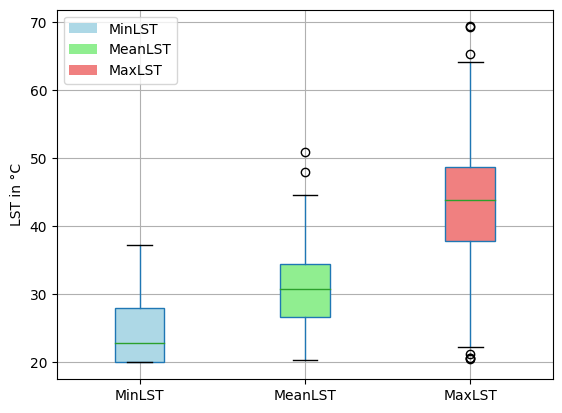

In [13]:
# boxplot of minimum, mean and maximum LST
fig, ax = plt.subplots()
boxplot = df2.boxplot(column=['MinLST', 'MeanLST', 'MaxLST'], ax=ax, patch_artist=True, return_type='dict')

# set the title and y-axis label
ax.set_ylabel('LST in °C')

# set the colors for the boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# create a legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightblue', label='MinLST'),
                   Patch(facecolor='lightgreen', label='MeanLST'),
                   Patch(facecolor='lightcoral', label='MaxLST')]
ax.legend(handles=legend_elements, loc='upper left')

# show the plot
plt.show()


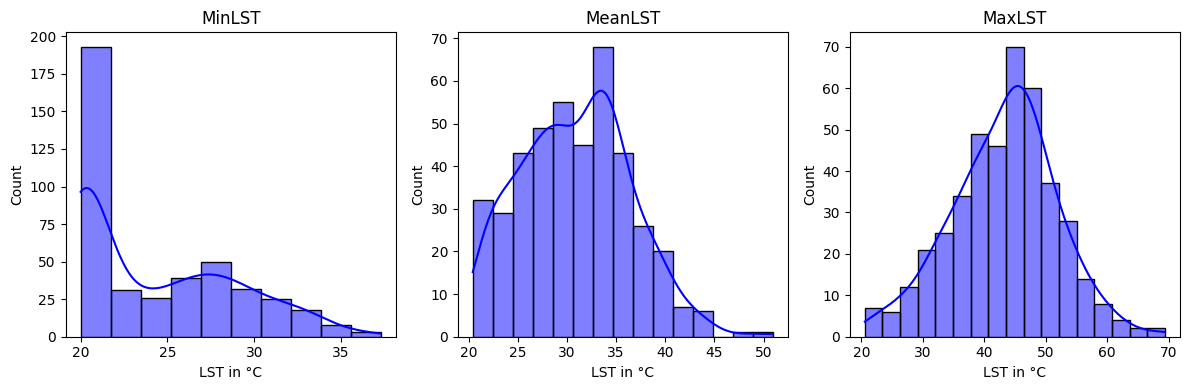

In [14]:
# histogram of minimum, mean and maximum LST
# create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# plot histograms with distribution curves for each column
for i, col in enumerate(['MinLST', 'MeanLST', 'MaxLST']):
    sns.histplot(df2[col], kde=True, color='blue', ax=axes[i])
    #sns.kdeplot(df2[col], color='red', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('LST in °C')

# set the figure title
#fig.suptitle('Histograms with distribution curves')

# adjust the spacing between subplots
fig.tight_layout()

# show the plot
plt.show()


**5. Calender heatmaps**

In [15]:
# mean LST
alt.Chart(df2).mark_rect().encode(
    x='Year:O',
    y='Month:O',
    color=alt.Color(
        'MeanLST:Q', title = 'Mean LST (in °C)', scale=alt.Scale(scheme='blueorange', domain=(20,45 ))),
    tooltip=[
        alt.Tooltip('Year:O', title='Year'),
        alt.Tooltip('Month:O', title='Month'),
        alt.Tooltip('MeanLST:Q', title='LST')
    ]).properties(width=600, height=300)

alt.Chart(...)

In [16]:
# maximum LST
alt.Chart(df2).mark_rect().encode(
    x='Year:O',
    y='Month:O',
    color=alt.Color(
        'MaxLST:Q', title = 'Max LST (in °C)', scale=alt.Scale(scheme='blueorange', domain=(20,66 ))),
    tooltip=[
        alt.Tooltip('Year:O', title='Year'),
        alt.Tooltip('Month:O', title='Month'),
        alt.Tooltip('MaxLST:Q', title='LST')
    ]).properties(width=600, height=300)

alt.Chart(...)

In [17]:
# minimum LST
alt.Chart(df2).mark_rect().encode(
    x='Year:O',
    y='Month:O',
    color=alt.Color(
        'MinLST:Q', title = 'Min LST (in °C)', scale=alt.Scale(scheme='blueorange', domain=(20,37 ))),
    tooltip=[
        alt.Tooltip('Year:O', title='Year'),
        alt.Tooltip('Month:O', title='Month'),
        alt.Tooltip('MinLST:Q', title='LST')
    ]).properties(width=600, height=300)

alt.Chart(...)

**6. Warmth score**

In [18]:
# number of warmer months per year in LST categories and warmth score
# Group the dataframe by Year and Month, and then calculate the mean of the LST values
df2_grouped = df2.groupby(['Year', 'Month']).mean().reset_index()

# Create filters to count the months that meet the specified temperature criteria
mean_filter = df2_grouped['MeanLST'] >= 32
max_filter = df2_grouped['MaxLST'] >= 42
min_filter = df2_grouped['MinLST'] >= 28

# Apply the filters to the grouped dataframe and count the months for each criterion
minLST_count = df2_grouped[min_filter].groupby('Year').size().reset_index(name='MinLST (≥ 28 °C)')
meanLST_count = df2_grouped[mean_filter].groupby('Year').size().reset_index(name='MeanLST (≥ 32 °C)')
maxLST_count = df2_grouped[max_filter].groupby('Year').size().reset_index(name='MaxLST (≥ 42 °C)')

# Merge the three dataframes on the 'Year' column
result = minLST_count.merge(meanLST_count, on='Year').merge(maxLST_count, on='Year')
# Calculate the warmth score and add it as a fourth column
result['Warmth Score'] = result['MinLST (≥ 28 °C)'] + result['MeanLST (≥ 32 °C)'] + result['MaxLST (≥ 42 °C)']
print(result)


    Year  MinLST (≥ 28 °C)  MeanLST (≥ 32 °C)  MaxLST (≥ 42 °C)  Warmth Score
0   2000                 3                  5                 5            13
1   2001                 1                  3                 4             8
2   2002                 3                  5                 6            14
3   2003                 4                  4                 4            12
4   2004                 2                  7                 8            17
5   2005                 3                  7                 6            16
6   2006                 5                  7                 9            21
7   2007                 3                  4                 7            14
8   2008                 2                  4                 5            11
9   2009                 2                  6                 8            16
10  2010                 3                  4                 6            13
11  2011                 2                  3                 7 

<ipython-input-18-ead2f2b29eda>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_grouped = df2.groupby(['Year', 'Month']).mean().reset_index()


**7. Yearly comparison**

In [19]:
# year-wise LST range
# Group the dataframe by Year and calculate the mean of the LST values
df2_grouped = df2.groupby('Year').mean().reset_index()

# Calculate the minimum and maximum temperature range for each year
min_temperature = df2_grouped['MinLST']
max_temperature = df2_grouped['MaxLST']

# Add the min_temperature and max_temperature as new columns to the grouped dataframe
df2_grouped['Min Temperature'] = min_temperature
df2_grouped['Max Temperature'] = max_temperature

# Select the columns 'Year', 'Min Temperature', and 'Max Temperature' from the grouped dataframe
result = df2_grouped[['Year', 'Min Temperature', 'Max Temperature']]

print(result)


    Year  Min Temperature  Max Temperature
0   2000        23.620267        39.246831
1   2001        24.143079        39.542192
2   2002        24.528403        44.077427
3   2003        27.837822        43.799108
4   2004        25.401349        43.703277
5   2005        25.869049        43.833724
6   2006        27.250059        47.931487
7   2007        24.570124        45.229699
8   2008        23.849363        41.987479
9   2009        25.894126        47.446718
10  2010        25.848326        45.921738
11  2011        24.029453        44.043398
12  2012        21.861331        42.949105
13  2013        22.221769        41.682483
14  2014        22.422889        41.205478
15  2015        25.665606        45.406316
16  2016        24.732166        45.971730
17  2017        22.068277        39.389134
18  2018        22.995234        40.801275
19  2019        24.071847        43.334138
20  2020        23.021131        41.629851
21  2021        24.237837        41.264895


<ipython-input-19-bba2d456e881>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_grouped = df2.groupby('Year').mean().reset_index()


**8. Trend of LST**

In [20]:
# Base chart
base = alt.Chart(df2).encode(
    x=alt.X('Timestamp:T', title='Year'),
    tooltip=[
        alt.Tooltip('Timestamp:T', title='Year')
    ]
)

# MeanLST line chart and trendline
mean_line = base.mark_line(color='red').encode(
    y=alt.Y('MeanLST:Q', title='LST in °C'),
    tooltip=alt.Tooltip('MeanLST:Q'),
    color=alt.value('red')
)

#mean_trendline = base.transform_regression("Timestamp", "MeanLST", method="linear").mark_line(color="blue", strokeWidth=2)

# MinLST line chart
min_line = base.mark_line(color='violet').encode(
    y=alt.Y('MinLST:Q'),
    tooltip=alt.Tooltip('MinLST:Q'),
    color=alt.value('violet')
)

# MaxLST line chart
max_line = base.mark_line(color='grey').encode(
    y=alt.Y('MaxLST:Q'),
    tooltip=alt.Tooltip('MaxLST:Q'),
    color=alt.value('grey')
)

# Combine all lines and trendlines
chart = (mean_line + min_line + max_line).properties(width=600, height=300).interactive()

# Add legend manually
legend = alt.Chart(pd.DataFrame({
    'LST Type': ['MeanLST', 'MinLST', 'MaxLST'],
    'Color': ['red', 'violet', 'grey']
})).mark_circle(size=100).encode(
    y=alt.Y('LST Type:N', axis=alt.Axis(orient='right')),
    color=alt.Color('Color:N', scale=None, legend=None)
)

(chart | legend)

alt.HConcatChart(...)

In [21]:
# Quartile trend of LST
# Convert the Year column to datetime
df2['Year'] = pd.to_datetime(df2['Year'], format='%Y')

base = alt.Chart(df2).encode(
    x=alt.X('Year:T', title = 'Year'))

# MeanLST line, band, and trendline
mean_line = base.mark_line(color='green').encode(
    y=alt.Y('median(MeanLST):Q', title = 'LST in °C', scale=alt.Scale(domain=(10, 60))))
mean_band = base.mark_errorband(extent='iqr', color='green').encode(y='MeanLST:Q')
#mean_trendline = base.transform_regression("Year", "MeanLST", method="linear").mark_line(color="green", strokeWidth=2, strokeDash=[5, 5])

# MinLST line, band
min_line = base.mark_line(color='blue').encode(y=alt.Y('median(MinLST):Q'))
min_band = base.mark_errorband(extent='iqr', color='blue').encode(y='MinLST:Q')

# MaxLST line, band
max_line = base.mark_line(color='red').encode(y=alt.Y('median(MaxLST):Q'))
max_band = base.mark_errorband(extent='iqr', color='red').encode(y='MaxLST:Q')

# Combine all lines, bands, and trendlines
chart = ((mean_line + mean_band) + (min_line + min_band) + (max_line + max_band)).properties(width=600, height=300).interactive()

# Add legend manually
legend = alt.Chart(pd.DataFrame({
    'LST Type': ['MeanLST', 'MinLST', 'MaxLST'],
    'Color': ['green', 'blue', 'red']
})).mark_circle(size=100).encode(
    y=alt.Y('LST Type:N', axis=alt.Axis(orient='right')),
    color=alt.Color('Color:N', scale=None, legend=None)
)

(chart | legend)

alt.HConcatChart(...)

**9. Correlation analysis**

In [22]:
Data2 = load_csv('cor_points.csv')
df3 = Data2
print(df3.head())

  id       LST      NDVI       IBI     MNDWI
0  0  39.40906   0.54235  -0.11570  -0.42295
1  1  36.36639   0.58471  -0.09169  -0.45279
2  2  32.58897  -0.07039  -0.15250   0.33033
3  3  41.70393   0.32306  -0.08670  -0.23359
4  4  31.54074  -0.09610  -0.14656   0.35042


In [23]:
df3["NDVI"] = pd.to_numeric(df3["NDVI"])
df3["IBI"] = pd.to_numeric(df3["IBI"])
df3["MNDWI"] = pd.to_numeric(df3["MNDWI"])
df3["LST"] = pd.to_numeric(df3["LST"])

In [24]:
# corelation matrix
dfcor = df3[['LST', 'NDVI', 'IBI', 'MNDWI']]
cor_data = (dfcor
              .corr().stack()
              .reset_index()     # The stacking results in an index on the correlation values, we need the index as normal columns for Altair
              .rename(columns={0: 'correlation', 'level_0': 'variable', 'level_1': 'variable2'}))
cor_data['correlation_label'] = cor_data['correlation'].map('{:.2f}'.format)  # Round to 2 decimal
cor_data

,variable,variable2,correlation,correlation_label
0,LST,LST,1.000000,1.00
1,LST,NDVI,-0.094112,-0.09
2,LST,IBI,0.777207,0.78
3,LST,MNDWI,-0.467897,-0.47
4,NDVI,LST,-0.094112,-0.09
5,NDVI,NDVI,1.000000,1.00
6,NDVI,IBI,-0.277795,-0.28
7,NDVI,MNDWI,-0.746269,-0.75
8,IBI,LST,0.777207,0.78
9,IBI,NDVI,-0.277795,-0.28


In [25]:
base = alt.Chart(cor_data).encode(
    x='variable2:O',
    y='variable:O'    
)

# Text layer with correlation labels
# Colors are for easier readability
text = base.mark_text().encode(
    text='correlation_label',
    color=alt.condition(
        alt.datum.correlation > 0.5, 
        alt.value('white'),
        alt.value('black')
    )
)

# The correlation heatmap itself
cor_plot = base.mark_rect().encode(
    color='correlation:Q'
).properties(width=600, height=300)

cor_plot + text # The '+' means overlaying the text and rect layer

alt.LayerChart(...)

In [ ]:
# creating a dataframe to test LST vs NDVI correlation
dfndvi = df3[(df3["NDVI"] >= 0.2)]
dfndvi

In [27]:
# corelation matrix for NDVI and LST
dfcor2 = dfndvi[['LST', 'NDVI']]
cor_data2 = (dfcor2
              .corr().stack()
              .reset_index()     # The stacking results in an index on the correlation values, we need the index as normal columns for Altair
              .rename(columns={0: 'correlation', 'level_0': 'variable', 'level_1': 'variable2'}))
cor_data2['correlation_label'] = cor_data2['correlation'].map('{:.2f}'.format)  # Round to 2 decimal
cor_data2

,variable,variable2,correlation,correlation_label
0,LST,LST,1.000000,1.00
1,LST,NDVI,-0.680723,-0.68
2,NDVI,LST,-0.680723,-0.68
3,NDVI,NDVI,1.000000,1.00


In [ ]:
# creating a dataframe by removing the vegetation pixel to test LST vs MNDWI correlation
dfmndwi = df3[(df3["NDVI"] < 0.2)]
dfmndwi

In [29]:
# corelation matrix for NDVI and LST
dfcor3 = dfmndwi[['LST', 'MNDWI']]
cor_data3 = (dfcor3
              .corr().stack()
              .reset_index()     # The stacking results in an index on the correlation values, we need the index as normal columns for Altair
              .rename(columns={0: 'correlation', 'level_0': 'variable', 'level_1': 'variable2'}))
cor_data3['correlation_label'] = cor_data3['correlation'].map('{:.2f}'.format)  # Round to 2 decimal
cor_data3

,variable,variable2,correlation,correlation_label
0,LST,LST,1.000000,1.00
1,LST,MNDWI,-0.903739,-0.90
2,MNDWI,LST,-0.903739,-0.90
3,MNDWI,MNDWI,1.000000,1.00


**10. Scatter plots of LST vs Spectral indices (IBI, MNDWI & NDVI)**

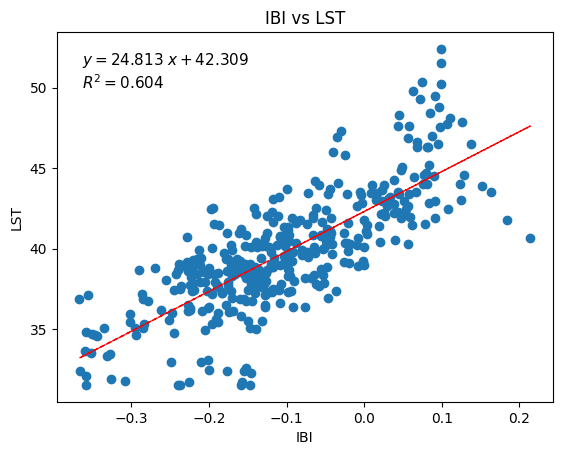

<Figure size 500x400 with 0 Axes>

In [30]:
# LST vs IBI
# Remove missing or invalid values from the data
clean_data = df3.dropna(subset=['IBI', 'LST'])
# clean_data = clean_data[(clean_data["NDVI"] >= 0.2)]

x = clean_data['IBI']
y = clean_data['LST']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
     fontsize=11, verticalalignment='top')

plt.title('IBI vs LST')
plt.xlabel('IBI')
plt.ylabel('LST')
plt.figure(figsize=(5, 4))
plt.show()


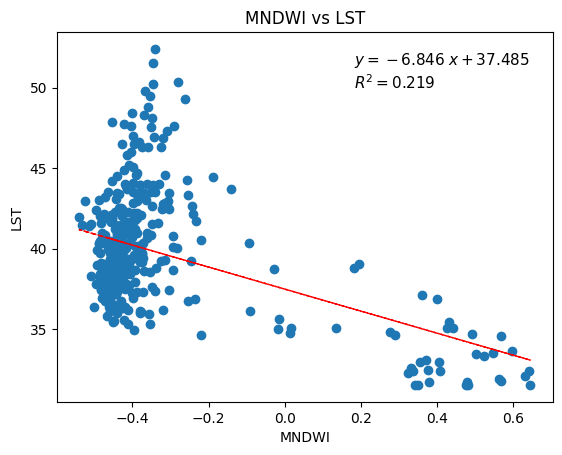

<Figure size 500x400 with 0 Axes>

In [31]:
# LST vs MNDWI
# Remove missing or invalid values from the data
clean_data2 = df3.dropna(subset=['MNDWI', 'LST'])
# clean_data = clean_data[(clean_data["NDVI"] >= 0.2)]

x = clean_data2['MNDWI']
y = clean_data2['LST']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.60, 0.95, text, transform=plt.gca().transAxes,
     fontsize=11, verticalalignment='top')

plt.title('MNDWI vs LST')
plt.xlabel('MNDWI')
plt.ylabel('LST')
plt.figure(figsize=(5, 4))
plt.show()

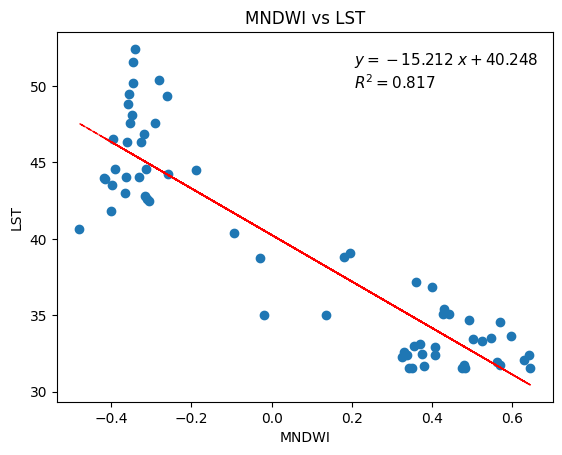

<Figure size 500x400 with 0 Axes>

In [32]:
# LST vs MNDWI (without the vegetation pixels)
# Remove missing or invalid values from the data
clean_data2 = dfmndwi.dropna(subset=['MNDWI', 'LST'])
# clean_data = clean_data[(clean_data["NDVI"] >= 0.2)]

x = clean_data2['MNDWI']
y = clean_data2['LST']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.60, 0.95, text, transform=plt.gca().transAxes,
     fontsize=11, verticalalignment='top')

plt.title('MNDWI vs LST')
plt.xlabel('MNDWI')
plt.ylabel('LST')
plt.figure(figsize=(5, 4))
plt.show()

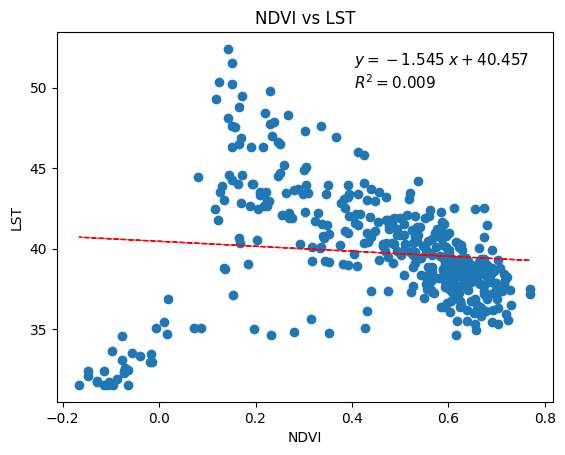

<Figure size 500x400 with 0 Axes>

In [33]:
# LST vs NDVI
# Remove missing or invalid values from the data
clean_data = df3.dropna(subset=['NDVI', 'LST'])
# clean_data = clean_data[(clean_data["NDVI"] >= 0.2)]

x = clean_data['NDVI']
y = clean_data['LST']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.60, 0.95, text, transform=plt.gca().transAxes,
     fontsize=11, verticalalignment='top')

plt.title('NDVI vs LST')
plt.xlabel('NDVI')
plt.ylabel('LST')
plt.figure(figsize=(5, 4))
plt.show()

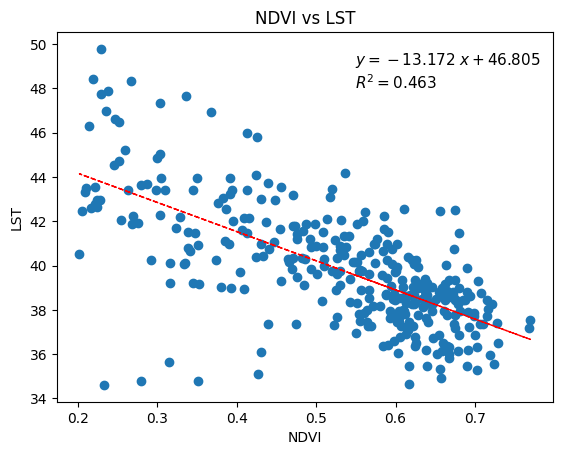

<Figure size 500x400 with 0 Axes>

In [34]:
# LST vs NDVI (with only vegetation pixels)
# Remove missing or invalid values from the data
clean_data = dfndvi.dropna(subset=['NDVI', 'LST'])
# clean_data = clean_data[(clean_data["NDVI"] >= 0.2)]

x = clean_data['NDVI']
y = clean_data['LST']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.60, 0.95, text, transform=plt.gca().transAxes,
     fontsize=11, verticalalignment='top')

plt.title('NDVI vs LST')
plt.xlabel('NDVI')
plt.ylabel('LST')
plt.figure(figsize=(5, 4))
plt.show()

**11. Revised correlation matrix**

In [35]:
# Calculate individual correlation values
cor_LST_NDVI = dfndvi[['LST', 'NDVI']].corr().loc['LST', 'NDVI']
cor_LST_MNDWI = dfmndwi[['LST', 'MNDWI']].corr().loc['LST', 'MNDWI']
cor_LST_IBI = df3[['LST', 'IBI']].corr().loc['LST', 'IBI']
cor_NDVI_IBI = df3[['NDVI', 'IBI']].corr().loc['NDVI', 'IBI']
cor_NDVI_MNDWI = df3[['NDVI', 'MNDWI']].corr().loc['NDVI', 'MNDWI']
cor_IBI_MNDWI = df3[['IBI', 'MNDWI']].corr().loc['IBI', 'MNDWI']

# Create a new dataframe with the desired correlations
cor_matrix = pd.DataFrame({'LST': [1, cor_LST_NDVI, cor_LST_IBI, cor_LST_MNDWI],
                           'NDVI': [cor_LST_NDVI, 1, cor_NDVI_IBI, cor_NDVI_MNDWI],
                           'IBI': [cor_LST_IBI, cor_NDVI_IBI, 1, cor_IBI_MNDWI],
                           'MNDWI': [cor_LST_MNDWI, cor_NDVI_MNDWI, cor_IBI_MNDWI, 1]},
                          index=['LST', 'NDVI', 'IBI', 'MNDWI'])

# Display the combined correlation matrix
cor_matrix


,LST,NDVI,IBI,MNDWI
LST,1.000000,-0.680723,0.777207,-0.903739
NDVI,-0.680723,1.000000,-0.277795,-0.746269
IBI,0.777207,-0.277795,1.000000,-0.427128
MNDWI,-0.903739,-0.746269,-0.427128,1.000000


In [36]:
# Convert the correlation matrix to a long format
cor_data_combined = cor_matrix.stack().reset_index().rename(columns={'level_0': 'variable', 'level_1': 'variable2', 0: 'correlation'})

# Add the correlation_label column
cor_data_combined['correlation_label'] = cor_data_combined['correlation'].map('{:.2f}'.format)

# Altair chart
base = alt.Chart(cor_data_combined).encode(
    x='variable2:O',
    y='variable:O'    
)

# Text layer with correlation labels
# Colors are for easier readability
text = base.mark_text().encode(
    text='correlation_label',
    color=alt.condition(
        alt.datum.correlation > 0.5, 
        alt.value('white'),
        alt.value('black')
    )
)

# The correlation heatmap itself
cor_plot = base.mark_rect().encode(
    color='correlation:Q'
).properties(width=600, height=300)

cor_plot + text  # The '+' means overlaying the text and rect layer


alt.LayerChart(...)

**12. Hotspots Analysis**

In [37]:
# all the data are from the month of February
myDatap = load_csv('hotspot_lst.csv')
dfp = myDatap
df4 = dfp
print(df4.head())

                SystemIndex         Millis                LST1  \
0    2_LT05_126052_20000310   952656810594  29.652098339828967   
1  1_2_LE07_126052_20000318   953349156882                       
2    2_LT05_126052_20000326   954039256973   33.63540231333212   
3    2_LT05_126052_20010329   985834811171   37.51185087756261   
4  1_2_LE07_126052_20020308  1015556937240   36.23550056099566   

                 LST2                LST3                LST4  \
0  31.672998917408563   28.88275181705876   32.49847649640333   
1                      31.579005041575783                       
2                                          31.396561135578793   
3   37.57970801775025                                           
4   41.63041569725954   36.14599846828071   42.23182546508025   

                LST5                Timestamp  Year Month Day DOY  
0                     2000-03-10 02:53:30.594  2000     3  10  70  
1                     2000-03-18 03:12:36.882  2000     3  18  78  
2  34.96

In [38]:
df4["LST1"] = pd.to_numeric(df4["LST1"])
df4["LST2"] = pd.to_numeric(df4["LST2"])
df4["LST3"] = pd.to_numeric(df4["LST3"])
df4["LST4"] = pd.to_numeric(df4["LST4"])
df4["LST5"] = pd.to_numeric(df4["LST5"])

LST1 = df4["LST1"]
LST2 = df4["LST2"]
LST3 = df4["LST3"]
LST4 = df4["LST4"]
LST5 = df4["LST5"]

df5 = df4

12.1 Point 1: Hotspot 1

In [40]:
# make sure the first point does not have any null value
dflst1 = df5[(df5["LST1"] > 0)]

In [41]:
# filter to take one value per year
dflst1 = dflst1[(dflst1["SystemIndex"] != '2_LT05_126052_20000326')]
dflst1 = dflst1[(dflst1["SystemIndex"] != '2_LT05_126052_20010329')]
dflst1 = dflst1[(dflst1["SystemIndex"] != '1_2_LE07_126052_20050316')]
dflst1 = dflst1[(dflst1["SystemIndex"] != '2_LE07_126052_20070306')]
dflst1 = dflst1[(dflst1["SystemIndex"] != '1_2_LE07_126052_20140309')]
dflst1 = dflst1[(dflst1["SystemIndex"] != '1_2_LE07_126052_20150312')]
dflst1 = dflst1[(dflst1["SystemIndex"] != '1_2_LE07_126052_20160314')]
dflst1 = dflst1[(dflst1["SystemIndex"] != '1_1_LC08_126052_20160322')]
dflst1 = dflst1[(dflst1["SystemIndex"] != '1_2_LE07_126052_20160330')]
dflst1 = dflst1[(dflst1["SystemIndex"] != '1_2_LE07_126052_20190307')]
dflst1 = dflst1[(dflst1["SystemIndex"] != '1_2_LE07_126052_20190323')]

In [42]:
base_chart = alt.Chart(dflst1).encode(
    x=alt.X('Timestamp:T', title='Date'),
    y=alt.Y('LST1:Q', scale=alt.Scale(domain=[20, 50]), title='LST in °C'),
    tooltip=[
        alt.Tooltip('Timestamp:T', title='Year'),
        alt.Tooltip('LST1:Q')
    ]
)

line_chart = base_chart.mark_line()

label_chart = base_chart.mark_text(align='left', dx=10, dy=-3).encode(
    text=alt.Text('LST1:Q', format='.2f')
)

trend_chart = base_chart.transform_regression(
    'Timestamp', 'LST1', method='linear'
).mark_line(color='green', opacity=0.5)

combined_chart = line_chart + label_chart + trend_chart

combined_chart.properties(width=800, height=400).interactive()

alt.LayerChart(...)

12.2 Point 2: Hotspot 2

In [43]:
# make sure the first point does not have any null value
dflst2 = df5[(df5["LST2"] > 0)]

In [44]:
# filter to take one value per year
dflst2 = dflst2[(dflst2["SystemIndex"] != '2_LT05_126052_20060311')]
dflst2 = dflst2[(dflst2["SystemIndex"] != '2_LT05_126052_20070314')]
dflst2 = dflst2[(dflst2["SystemIndex"] != '2_LT05_126052_20070330')]
dflst2 = dflst2[(dflst2["SystemIndex"] != '1_1_LC08_126052_20140301')]
dflst2 = dflst2[(dflst2["SystemIndex"] != '1_2_LE07_126052_20140309')]
dflst2 = dflst2[(dflst2["SystemIndex"] != '1_2_LE07_126052_20160314')]
dflst2 = dflst2[(dflst2["SystemIndex"] != '1_1_LC08_126052_20160322')]
dflst2 = dflst2[(dflst2["SystemIndex"] != '1_2_LE07_126052_20190307')]
dflst2 = dflst2[(dflst2["SystemIndex"] != '1_2_LE07_126052_20190323')]
dflst2 = dflst2[(dflst2["SystemIndex"] != '1_1_LC08_126052_20200301')]

In [45]:
base_chart = alt.Chart(dflst2).encode(
    x=alt.X('Timestamp:T', title='Date'),
    y=alt.Y('LST2:Q', scale=alt.Scale(domain=[25, 55]), title='LST in °C'),
    tooltip=[
        alt.Tooltip('Timestamp:T', title='Year'),
        alt.Tooltip('LST2:Q')
    ]
)

line_chart = base_chart.mark_line()

label_chart = base_chart.mark_text(align='left', dx=10, dy=-3).encode(
    text=alt.Text('LST2:Q', format='.2f')
)

trend_chart = base_chart.transform_regression(
    'Timestamp', 'LST2', method='linear'
).mark_line(color='green', opacity=0.5)

combined_chart = line_chart + label_chart + trend_chart

combined_chart.properties(width=800, height=400).interactive()

alt.LayerChart(...)

12.3 Point 3: Hotspot 4

In [46]:
# make sure the first point does not have any null value
dflst4 = df5[(df5["LST4"] > 0)]

In [47]:
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_2_LE07_126052_20170301')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '2_LT05_126052_20000326')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_2_LE07_126052_20020308')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_2_LE07_126052_20050316')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_2_LE07_126052_20070306')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_1_LC08_126052_20140317')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_1_LC08_126052_20140301')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_1_LC08_126052_20160322')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_2_LE07_126052_20160314')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_1_LC08_126052_20160306')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_1_LC08_126052_20180328')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_2_LE07_126052_20190307')]
dflst4 = dflst4[(dflst4["SystemIndex"] != '1_2_LE07_126052_20190323')]

In [49]:
base_chart = alt.Chart(dflst4).encode(
    x=alt.X('Timestamp:T', title='Date'),
    y=alt.Y('LST4:Q', scale=alt.Scale(domain=[25, 55]), title='LST in °C'),
    tooltip=[
        alt.Tooltip('Timestamp:T', title='Year'),
        alt.Tooltip('LST4:Q')
    ]
)

line_chart = base_chart.mark_line()

label_chart = base_chart.mark_text(align='left', dx=10, dy=-3).encode(
    text=alt.Text('LST4:Q', format='.2f')
)

trend_chart = base_chart.transform_regression(
    'Timestamp', 'LST4', method='linear'
).mark_line(color='green', opacity=0.5)

combined_chart = line_chart + label_chart + trend_chart

combined_chart.properties(width=800, height=400).interactive()

alt.LayerChart(...)

**Unfortunately, the interactive charts made using Altair package is not directly visible as github repository file. You have to run the code by yourself to see those charts. You can download the data for this by clicking CSV files.zip**